# チュートリアル

こちらのノートブックでは、セットアップしたデータに対して基本的な操作をおこなうためのチュートリアルが含まれています。

## ライブラリのインポート

必要なライブラリをインポートします。

In [1]:
import numpy as np # https://numpy.org/ja/
import pandas as pd # https://pandas.pydata.org/
import matplotlib.pyplot as plt
%matplotlib inline 

## データの読み込み

pickleファイルをデータフレームに読み込みます。

In [2]:
df=pd.read_pickle("../input/LSWMD_25519.pkl")

## データの確認

データフレームのメソッドを用いてデータのメタ情報を確認します。

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25519 entries, 0 to 25518
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   waferMap     25519 non-null  object 
 1   dieSize      25519 non-null  float64
 2   lotName      25519 non-null  object 
 3   waferIndex   25519 non-null  float64
 4   failureType  25519 non-null  object 
dtypes: float64(2), object(3)
memory usage: 997.0+ KB
None


格納されているデータの中身を三つほど確認します。

,waferMap,dieSize,lotName,waferIndex,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,20.0,Loc
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,12.0,Edge-Loc
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,13.0,Edge-Loc


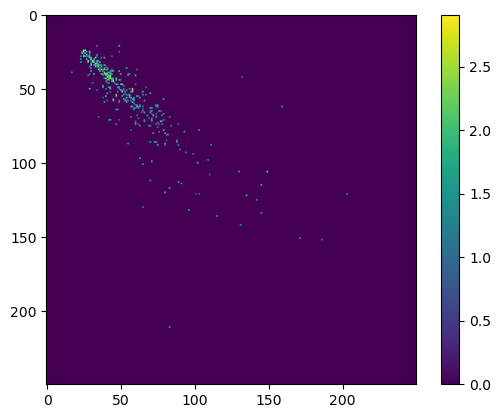

max_x_vale 212
max_y_vale 204


In [4]:
display(df.head(3))

from PIL import Image

def show_img(image):
    import matplotlib.pyplot as plt
    import numpy as np
    plt.figure()
    plt.imshow(image)
    plt.colorbar()
    plt.grid(False)
    plt.show()

wafer_maps = df['waferMap']
(max_x_vale,max_y_vale) = wafer_maps[0].shape;
for map in wafer_maps:
    (x,y) = map.shape
    if x > max_x_vale:
        max_x_vale = x
    if y > max_y_vale:
        max_y_vale = y
max_value = 0
if max_x_vale > max_y_vale:
   max_value = max_x_vale
else :
    max_value =max_y_vale
size_map = np.zeros(shape=(250,250),dtype=np.int32)
for map in wafer_maps:
    (x,y) = map.shape
    size_map[x-1, y-1] += 1
size_map = size_map * 2
size_map = size_map + 1
size_map = np.log(size_map)
size_map = size_map * 2
size_map = size_map + 1
size_map = np.log(size_map)
plt.figure()
plt.imshow(size_map)
plt.colorbar()
plt.grid(False)
plt.show()
print('max_x_vale',max_x_vale)
print('max_y_vale',max_y_vale)


各カテゴリーごとのwaferMapの中身を表示します。

In [5]:
def normalize_map(map, resize_shape=(64,64)):
    (map_y,map_x) = map.shape
    (ret_y,ret_x) = resize_shape
    block_y = (map_y * 1.0) / ret_y
    block_x = (map_x * 1.0) / ret_x
    def avg_clor(y,x):
        return 0
    def get_clor(y,x):
        x += 0.5
        y += 0.5
        
    return [[get_clor(y,x) for x in gange(resize_shape[1])]for y in gange(resize_shape[0])]

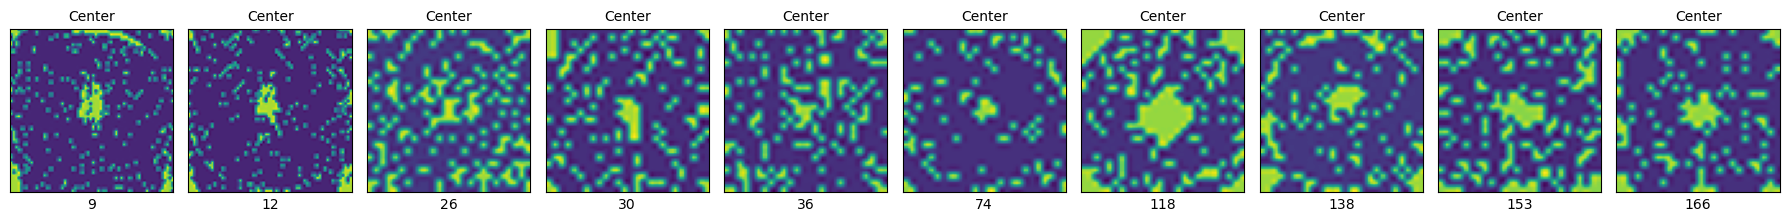

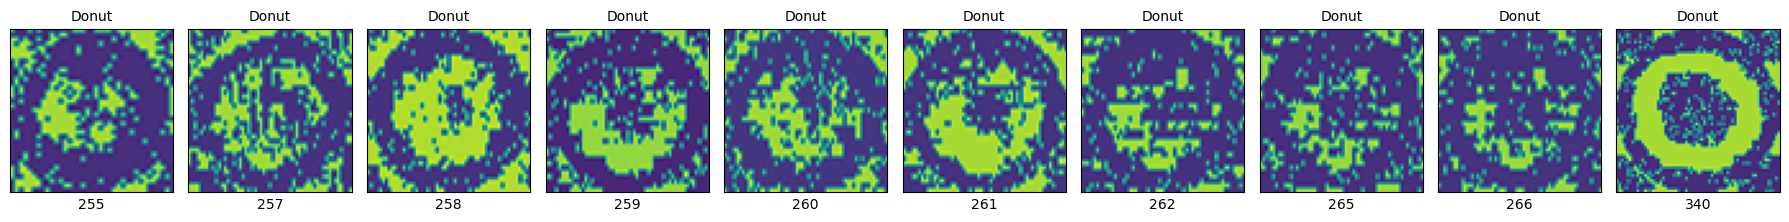

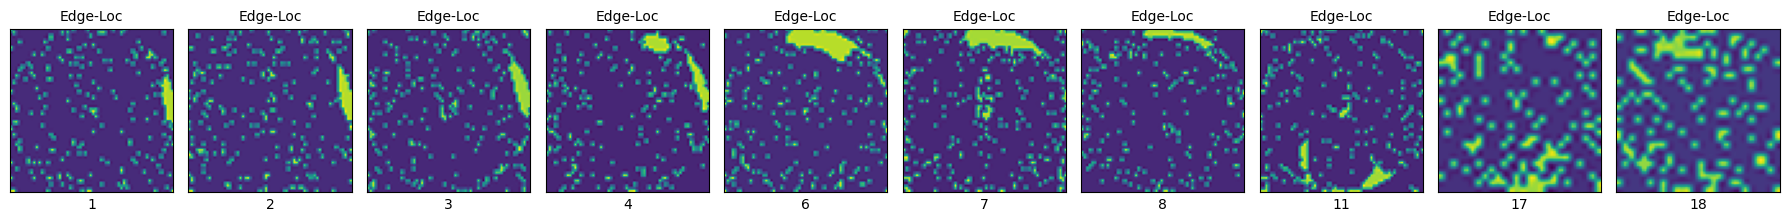

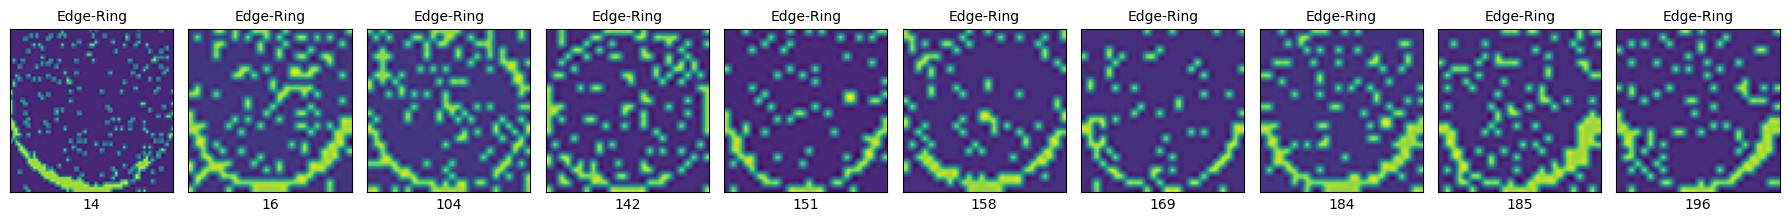

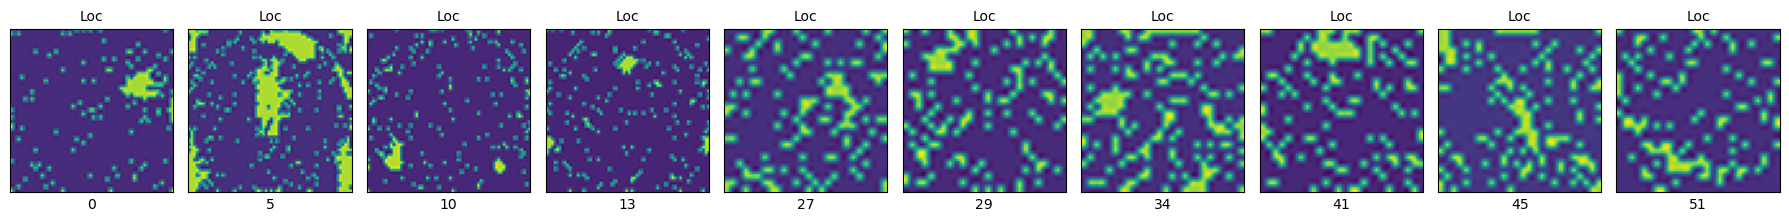

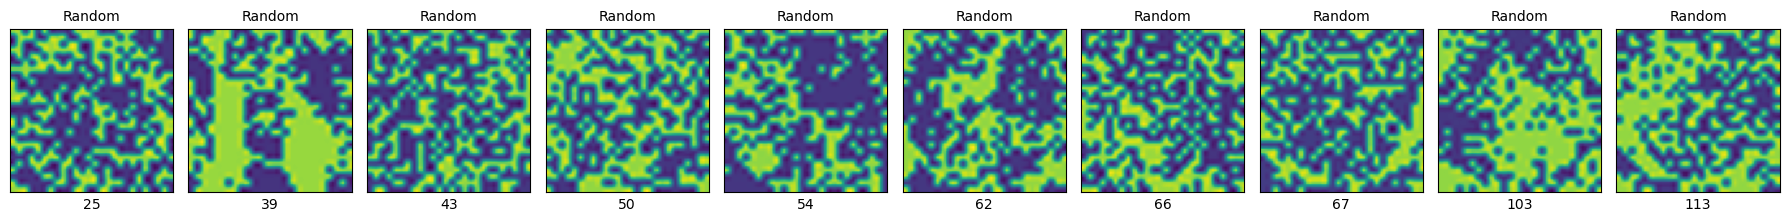

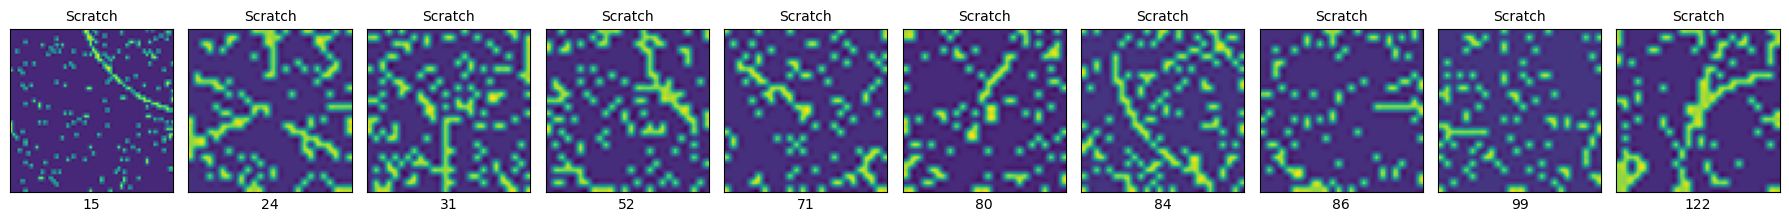

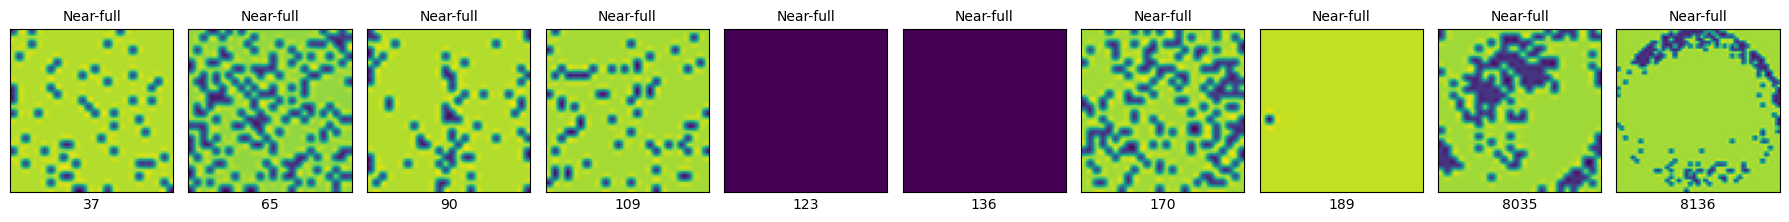

In [6]:
x = [0,1,2,3,4,5,6,7]
labels2 = ['Center','Donut','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Near-full']

for k in x:
    fig, ax = plt.subplots(nrows = 1, ncols = 10, figsize=(18, 12))
    ax = ax.ravel(order='C')
    for j in [k]:
        img = df.waferMap[df.failureType==labels2[j]]
        for i in range(10):
            ax[i].imshow(normalize_map(img[img.index[i]]))
            ax[i].set_title(df.failureType[img.index[i]], fontsize=10)
            ax[i].set_xlabel(df.index[img.index[i]], fontsize=10)
            ax[i].set_xticks([])
            ax[i].set_yticks([])
    plt.tight_layout()
    plt.show() 